In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True

In [3]:
# x0 = 0
# z0 = h0
# vx0 = v0cos(alpha)
# vz0 = v0sin(alpha)

In [4]:
# Pirmais uzdevums

In [35]:
x0, z0 = 0, 1.85
x1, z1 = 0, 0.85
x2, z2 = 0, 2.85
v0 = 29
alpha_deg = 42
alpha = np.radians(alpha_deg)
gamma_no_drag = 0
g = 3.7
v_term = 3200
y0 = [x0, z0, v0*np.cos(alpha), v0*np.sin(alpha)]
y1 = [x1, z1, v0*np.cos(alpha), v0*np.sin(alpha)]
y2 = [x2, z2, v0*np.cos(alpha), v0*np.sin(alpha)]

a) Range without air resistance: 227.3651593548088 m Time of flight: 10.583508779196627 s h_0 = 1.85m
b) Range with air resistance: 227.35468507298305 m Time of flight: 10.583338171668164 s h_0 = 1.85m
a) Range without air resistance: 226.28759935786655 m Time of flight: 10.532643004600855 s h_0 = 0.85m
a) Range without air resistance: 228.44271935175104 m Time of flight: 10.633893818668213 s h_0 = 2.85m


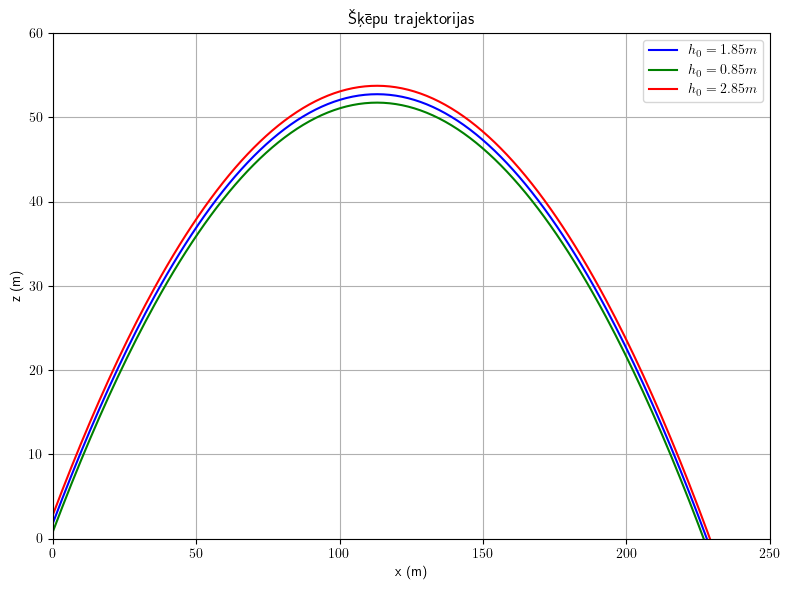

In [42]:
# 1. a) t = 8.7s
# initial conditions
# x0=0, h0=1.85, v0=29, alpha=42
# dxdt = vx
# dzdt = vz
# dvxdt = - gamma * vx * sqrt(vx^2 + vy^2)
# dvzdt = - g - gamma * vz * sqrt(vx^2 + vz^2)
# gamma = g / v_term^2
# no friction => gamma=0

t_span = [0, 500]
t_eval = np.linspace(t_span[0], t_span[1], 10001)

def eq(t, state, g, v_term, gamma):
    x, z, vx, vz = state
    speed = np.sqrt(vx**2 + vz**2)
    ax = - gamma * vx * speed
    az = -g - gamma * vz * speed
    return [vx, vz, ax, az]

def time_of_flight(sol):
    z = sol.y[1]
    t = sol.t

    below_zero = np.where(z < 0)[0]
    if len(below_zero) == 0:
        return t[-1]
    idx = below_zero[0]
    if idx == 0:
        return t[0]
    t1, t2 = t[idx-1], t[idx]
    z1, z2 = z[idx-1], z[idx]
    tf = t1 + (0 - z1) * (t2 - t1) / (z2 - z1)
    return tf

# Solve without air resistance (γ = 0)
gamma_no_drag = 0
sol_nodrag = solve_ivp(eq, t_span, y0, t_eval=t_eval, args=(g, v_term, gamma_no_drag))

sol_nodrag_1 = solve_ivp(eq, t_span, y1, t_eval=t_eval, args=(g, v_term, gamma_no_drag))

sol_nodrag_2 = solve_ivp(eq, t_span, y2, t_eval=t_eval, args=(g, v_term, gamma_no_drag))

# Solve with air resistance (γ = g/v_term**2)
gamma_drag = g / (v_term ** 2)
sol_drag = solve_ivp(eq, t_span, y0, t_eval=t_eval, args=(g, v_term, gamma_drag))

def compute_range(sol):
    valid = sol.y[1] >= 0
    if np.any(valid):
        return sol.y[0][valid][-1]
    else:
        return sol.y[0][-1]
    
range_no_drag = compute_range(sol_nodrag)
range_drag = compute_range(sol_drag)
range_no_drag_1 = compute_range(sol_nodrag_1)
range_no_drag_2 = compute_range(sol_nodrag_2)

print("a) Range without air resistance:", range_no_drag, "m", "Time of flight:", time_of_flight(sol_nodrag), "s", 'h_0 = 1.85m')
print("b) Range with air resistance:", range_drag, "m", "Time of flight:", time_of_flight(sol_drag), "s", 'h_0 = 1.85m')
print("a) Range without air resistance:", range_no_drag_1, "m", "Time of flight:", time_of_flight(sol_nodrag_1), "s", 'h_0 = 0.85m')
print("a) Range without air resistance:", range_no_drag_2, "m", "Time of flight:", time_of_flight(sol_nodrag_2), "s", 'h_0 = 2.85m')

plt.figure(figsize=(8, 6))
plt.plot(sol_nodrag.y[0], sol_nodrag.y[1], 'b-', label=r"$h_0 = 1.85m$")
plt.plot(sol_nodrag_1.y[0], sol_nodrag_1.y[1], 'g-', label=r"$h_0 = 0.85m$")
plt.plot(sol_nodrag_2.y[0], sol_nodrag_2.y[1], 'r-', label=r"$h_0 = 2.85m$")
# plt.plot(sol_nodrag.y[0], sol_nodrag.y[1], 'b-', label="Without Air Resistance")
# plt.plot(sol_drag.y[0], sol_drag.y[1], 'r--', label="With Air Resistance")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.ylim(0, 60)
plt.xlim(0, 250)
plt.title("Šķēpu trajektorijas")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Optimal angle (without air resistance): 44.49438202247191


(0.0, 90.0)

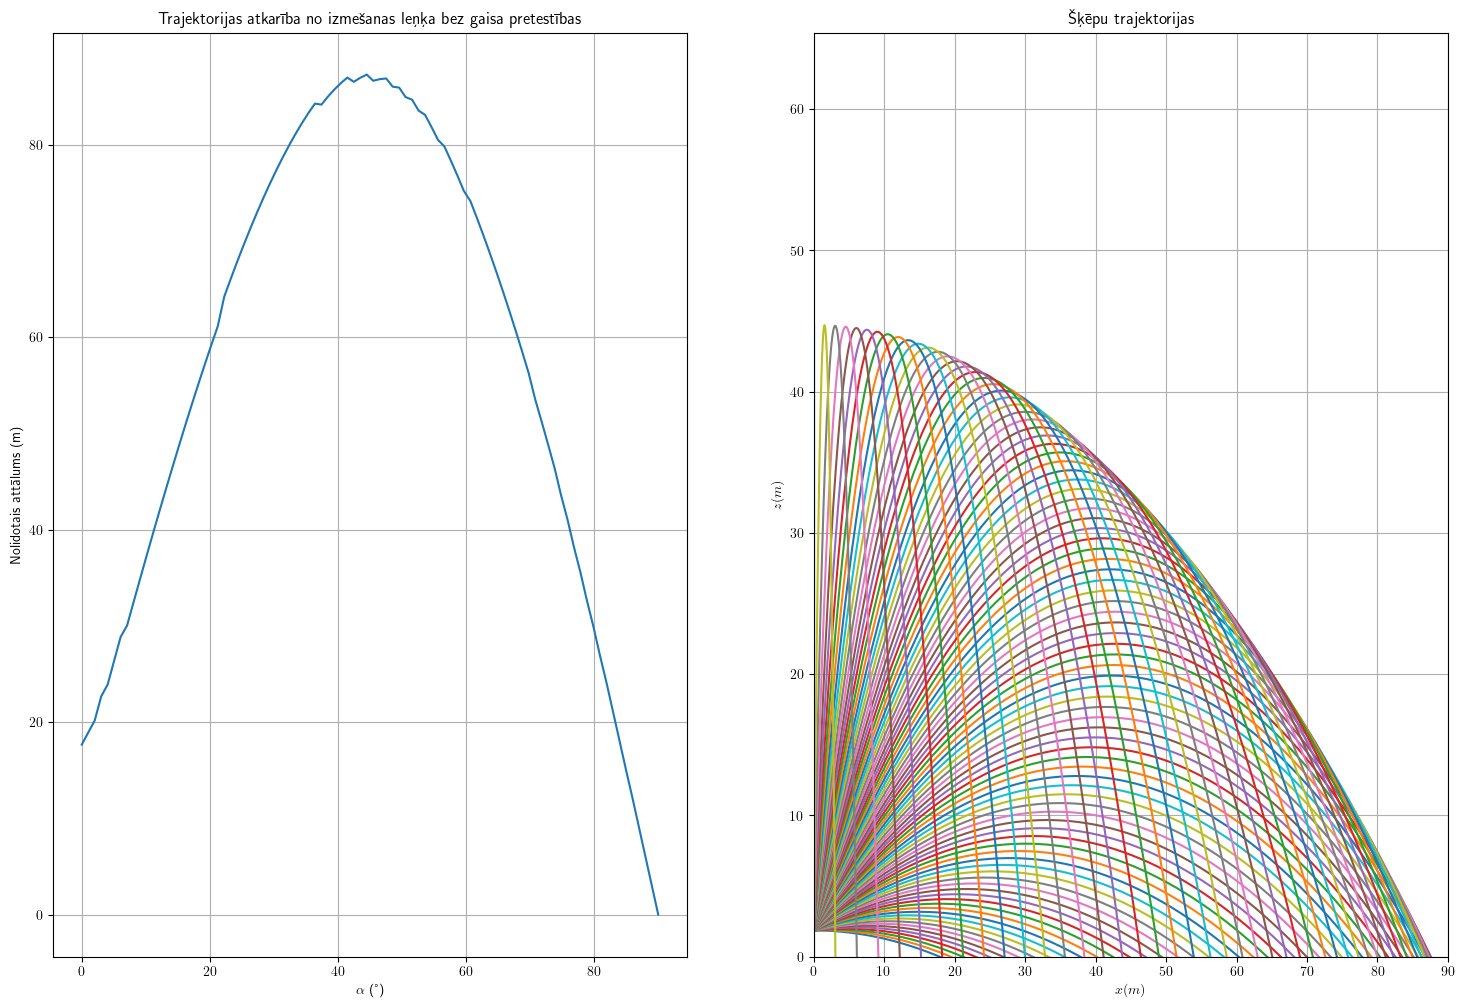

In [ ]:
# proving that 45 degrees is the optimal angle (without friction)

def compute_range_for_angle(alpha):
    y0 = [x0, z0, v0*np.cos(alpha), v0*np.sin(alpha)]
    sol = solve_ivp(eq, t_span, y0, t_eval=t_eval, args=(g, v_term, gamma_no_drag))
    return compute_range(sol)

alphas = np.linspace(0, np.pi/2, 90)
ranges = [compute_range_for_angle(alpha) for alpha in alphas]
print("Optimal angle (without air resistance):", np.degrees(alphas[np.argmax(ranges)]))

def eq(t, state, g, v_term, gamma):
    x, z, vx, vz = state
    speed = np.sqrt(vx**2 + vz**2)
    ax = - gamma * vx * speed
    az = -g - gamma * vz * speed
    return [vx, vz, ax, az]

ynew = [x0, z0, v0*np.cos(alpha), v0*np.sin(alpha)]

def v_all_alphas(alpha):
    ynew = [x0, z0, v0*np.cos(alpha), v0*np.sin(alpha)]
    sol = solve_ivp(eq, t_span, ynew, t_eval=t_eval, args=(g, v_term, gamma_no_drag))
    return sol

sol = [v_all_alphas(alpha) for alpha in alphas]

fig, ax = plt.subplots(1, 2, figsize=(18,12))

ax[0].plot(np.degrees(alphas), ranges)
ax[0].set_xlabel(r"$\alpha$ (°)")
ax[0].set_ylabel("Nolidotais attālums (m)")
ax[0].grid(True)
ax[0].set_title("Trajektorijas atkarība no izmešanas leņķa bez gaisa pretestības")

for i in range(0, len(sol)):
    ax[1].plot(sol[i].y[0], sol[i].y[1], label = str(np.degrees(alphas[i])) + "°")

ax[1].set_xlabel(r"$x (m)$")
ax[1].set_ylabel(r"$z (m)$")
ax[1].grid(True)
ax[1].set_title("Šķēpu trajektorijas")
ax[1].set_ylim(0)
ax[1].set_xlim(0, 90)
